# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Import Dataset(s)

In [2]:
from data import Dataset, Dataset_SimChen

In [3]:
signal = Dataset('../data/signal_TDR.root')

In [4]:
mu_neutron_bg = Dataset_SimChen('../data/muon_neutron_beam_bg.root')

In [5]:
other_bg = Dataset_SimChen('../data/other_beam_bg.root')

### Drawing Function(s)

In [6]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

### Sandbox

In [7]:
print signal.get_track_phis()[0:300]
print len(signal.get_track_phis())

[ 0.          0.02094395  0.0418879   0.06283185  0.0837758   0.10471976
  0.12566371  0.14660766  0.16755161  0.18849556  0.20943951  0.23038346
  0.25132741  0.27227136  0.29321531  0.31415927  0.33510322  0.35604717
  0.37699112  0.39793507  0.41887902  0.43982297  0.46076692  0.48171087
  0.50265482  0.52359878  0.54454273  0.56548668  0.58643063  0.60737458
  0.62831853  0.64926248  0.67020643  0.69115038  0.71209433  0.73303829
  0.75398224  0.77492619  0.79587014  0.81681409  0.83775804  0.85870199
  0.87964594  0.90058989  0.92153385  0.9424778   0.96342175  0.9843657
  1.00530965  1.0262536   1.04719755  1.0681415   1.08908545  1.1100294
  1.13097336  1.15191731  1.17286126  1.19380521  1.21474916  1.23569311
  1.25663706  1.27758101  1.29852496  1.31946891  1.34041287  1.36135682
  1.38230077  1.40324472  1.42418867  1.44513262  1.46607657  1.48702052
  1.50796447  1.52890842  1.54985238  1.57079633  1.59174028  1.61268423
  1.63362818  1.65457213  1.67551608  1.69646003  1.7

In [8]:
print signal.get_track_rhos()[0:299]
print len(signal.get_track_rhos())

[ 10.          10.13333333  10.26666667  10.4         10.53333333
  10.66666667  10.8         10.93333333  11.06666667  11.2         11.33333333
  11.46666667  11.6         11.73333333  11.86666667  12.          12.13333333
  12.26666667  12.4         12.53333333  12.66666667  12.8         12.93333333
  13.06666667  13.2         13.33333333  13.46666667  13.6         13.73333333
  13.86666667  14.          14.13333333  14.26666667  14.4         14.53333333
  14.66666667  14.8         14.93333333  15.06666667  15.2         15.33333333
  15.46666667  15.6         15.73333333  15.86666667  16.          16.13333333
  16.26666667  16.4         16.53333333  16.66666667  16.8         16.93333333
  17.06666667  17.2         17.33333333  17.46666667  17.6         17.73333333
  17.86666667  18.          18.13333333  18.26666667  18.4         18.53333333
  18.66666667  18.8         18.93333333  19.06666667  19.2         19.33333333
  19.46666667  19.6         19.73333333  19.86666667  20.        

In [9]:
def polDist(r1,p1,r2,p2):
    return np.sqrt(r1**2 + r2**2 - 2*r1*r2*np.cos(p1 - p2))

6.32594813944 0.00134106903385
5.36017935378 0.00549714698215
4.84390027087 0.0106200989804
4.92097694049 0.00966651458983
5.56678073746 0.00414556294691
6.61655524476 0.000838047206162
7.91064818803 7.99283413274e-05
5.46701681283 0.00475708678653
4.19788151315 0.022040758875
3.35292574966 0.0489307327114
3.2789151933 0.052026799437
4.01870437403 0.0264940839125
5.23788252214 0.00646396496217
6.67845205144 0.000756127202107
5.00148751785 0.00874786693087
3.43668771047 0.0455730604712
2.08957646676 0.115570223273
1.63862598262 0.142598455418
2.60152895588 0.0855991584305
4.0758896473 0.0250046051298
5.67582403571 0.0035565723381
5.03873875455 0.00834830509511
3.35949229532 0.0486618816004
1.6798460901 0.140180966312
0.0 0.199471140201
1.6798460901 0.140180966312
3.35949229532 0.0486618816004
5.03873875455 0.00834830509511
5.56798529219 0.00413861850816
4.00475314143 0.0268673984949
2.56822550381 0.0874613328509
1.6370632897 0.142689727956
2.07181516379 0.11664292045
3.38117899286 0.047

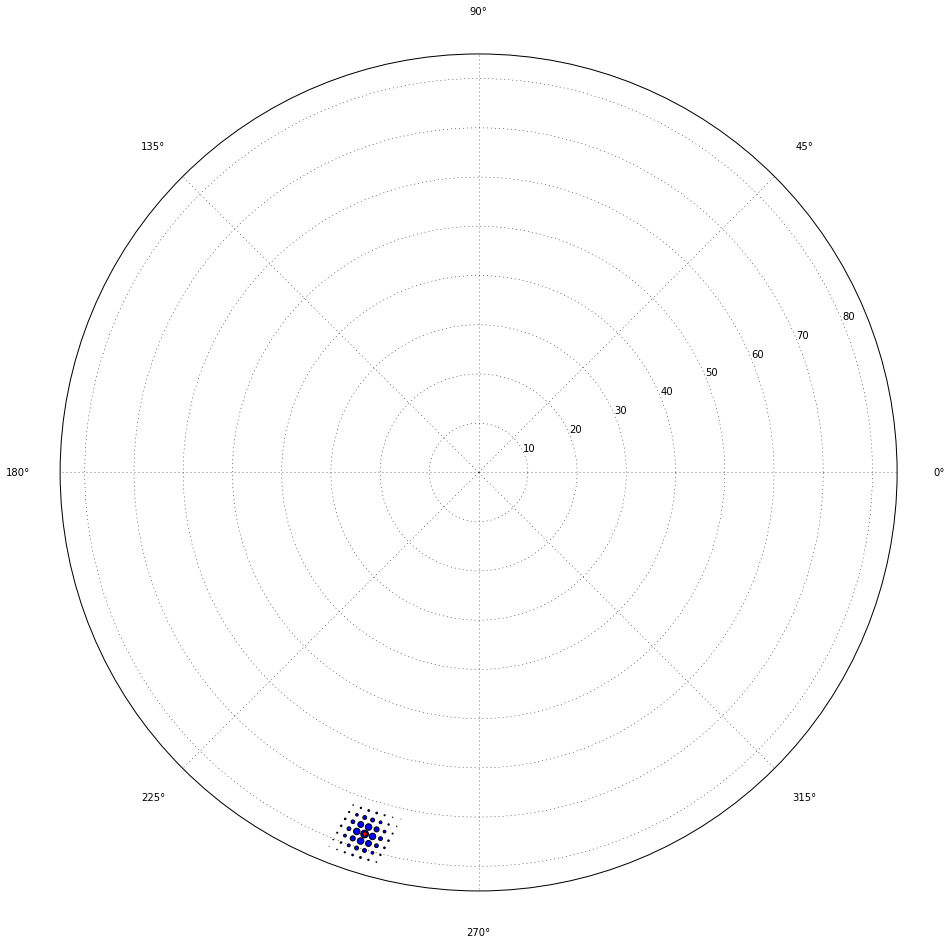

In [13]:
from scipy.sparse import *
from scipy.stats import norm
setup_plot_for_detector()
rhos, phis = signal.get_wires_rhos_and_phis()
#scatter(phis, rhos, marker='.', s=5)

wire_0 = 4000
neighs = wire_0
for i in range(3):
    neighs = np.unique(find(signal.neighbours_table[neighs,:])[1])

d_neigh = np.zeros(len(neighs))
p_neigh = np.zeros(len(neighs))
r_neigh = np.zeros(len(neighs))
a_neigh = np.zeros(len(neighs))
a_wire_0 = signal.angles_table[wire_0]
r_wire_0 = signal.radii_table[wire_0]
    
for i, n in enumerate(neighs):
    r_neigh[i] = signal.radii_table[n]
    a_neigh[i] = signal.angles_table[n]
    d_neigh[i] = polDist(r_wire_0, a_wire_0, r_neigh[i], a_neigh[i])
    p_neigh[i] = norm.pdf(d_neigh[i],scale=2)
    print d_neigh[i], p_neigh[i]

#scatter(phis[neighs],rhos[neighs], marker='o', c='b')
scatter(a_neigh,r_neigh, p_neigh*300, marker='o', c='b')
scatter(phis[wire_0],rhos[wire_0], marker='o', c='r')

In [11]:
print len(set(neighs))

49
